# Analyze customer behavior based on transaction data

Develop a data analysis project that focuses on understanding and analyzing
customer behavior based on transactional data. The goal is to perform Exploratory
Data Analysis (EDA) to derive valuable insights into customer preferences,
purchasing patterns, and overall behavior.

To analyze customer behavior based on the transaction data provided, we'll follow a structured approach to perform Exploratory Data Analysis (EDA). Here's a plan of execution:

1. **Load and Inspect Data:** Load each dataset to understand its structure, columns, and types of data it contains. This step will help us identify which datasets are most relevant for analyzing customer behavior.

2. **Data Cleaning:** Check for missing values, duplicates, or inconsistent data entries and address these issues to ensure the quality of our analysis.

3. **Data Integration:** If necessary, integrate data from multiple sources to create a comprehensive view of customer transactions.

4. **Descriptive Analysis:** Generate summary statistics to understand the distribution of transactions, including total sales, quantity sold, and other relevant metrics.

5. **Trend Analysis:** Identify any trends over time, such as seasonal variations in purchasing behavior or changes in preferences for certain product categories.

6. **Customer Segmentation:** Group customers based on their purchasing patterns or preferences, if possible, to identify distinct segments for targeted analysis.

7. **Product Analysis:** Analyze the popularity and sales performance of different product groups, brands, and items to identify customer preferences.

8. **Store Analysis:** If applicable, compare the performance and customer behavior across different store locations.

9. **Visualization:** Use visualizations to illustrate findings, including trend graphs, histograms, and pie charts to represent customer segments, product popularity, and other insights.

10. **Insights and Recommendations:** Summarize key insights regarding customer behavior and suggest actionable recommendations based on the analysis.

# EDA(Exploratory Data Analysis)

Let's start with step 1: **Load and Inspect Data.** We'll load each dataset, inspect its structure, and understand the types of data it contains. This will help us determine how to proceed with the analysis.

In [1]:
#import important library to perform EDA
import pandas as pd
import numpy as np

#to avoid the warning 
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load the datsets
ideal_data = pd.read_csv('Hackathon_Ideal_Data.csv')
mapping = pd.read_csv('Hackathon_Mapping_File.csv')
validation_data = pd.read_csv('Hackathon_Validation_Data.csv')
working_data = pd.read_csv('Hackathon_Working_Data.csv')
sample = pd.read_csv('Sample Submission.csv')

In [3]:
#lets display the first datset
ideal_data.head()

,MONTH,STORECODE,QTY,VALUE,GRP,SGRP,SSGRP,CMP,MBRD,BRD
0,M1,P1,25,83,HAIR CONDITIONERS,HAIR CONDITIONERS,HAIR CONDITIONERS,HINDUSTAN UNILEVER LIMITED,DOVE,DOVE HAIR FALL RESCUE
1,M1,P1,6,22,HAIR CONDITIONERS,HAIR CONDITIONERS,HAIR CONDITIONERS,HINDUSTAN UNILEVER LIMITED,DOVE,DOVE INTENSE REPAIR
2,M1,P1,4,15,HAIR CONDITIONERS,HAIR CONDITIONERS,HAIR CONDITIONERS,HINDUSTAN UNILEVER LIMITED,DOVE,DOVE OXYGEN MOISTURE
3,M1,P1,15,60,HAIR CONDITIONERS,HAIR CONDITIONERS,HAIR CONDITIONERS,L'OREAL INDIA,GARNIER,FRUCTIS
4,M1,P2,0,0,HAIR CONDITIONERS,HAIR CONDITIONERS,HAIR CONDITIONERS,HINDUSTAN UNILEVER LIMITED,CLINIC PLUS,CLINIC PLUS


**Ideal Data:** Contains transaction details such as quantity, value, product group, sub-group, company, and brand for a specific store and month.

In [4]:
#lets display the second datasets
mapping.head()

,File Name,Column Name,Column Description
0,Hackathon_Ideal_Data,MONTH,"Month ID (M1, M2, M3)"
1,NaN,STORECODE,"STORE CODE (P1, P2, …, P10)"
2,NaN,QTY,Sales Unit
3,NaN,VALUE,Sales Value
4,NaN,GRP,Category


**Mapping File:** Describes the columns of the Ideal Data file, providing a reference for understanding the data fields.

In [5]:
#lets display third dataset
validation_data.head()

,ID,STORECODE,MONTH,GRP
0,1112535,N1,M1,AFTER SHAVE LOTIONS
1,1112539,N1,M1,AGARBATTI & DHOOPBATTI
2,1112543,N1,M1,ALL AIR FRESHNERS(01/03)
3,1112547,N1,M1,ALL IODISED SALT
4,1112551,N1,M1,ANTACIDS


**Validation Data:** Includes an ID, store code, month, and product group. It seems to be structured for validating or testing predictions or analyses

In [6]:
#lets display fourth dataset
working_data.head()

,MONTH,STORECODE,DAY,BILL_ID,BILL_AMT,QTY,VALUE,PRICE,GRP,SGRP,SSGRP,CMP,MBRD,BRD
0,M1,N1,4,T375,225.0,1.0,225.0,225.0,BUTTER MARGR (4/94),BUTTER,SALTED,G C M M F,AMUL,AMUL
1,M1,N1,4,T379,95.0,1.0,95.0,95.0,CONFECTIONERY - ECLAIRS,CONFECTIONERY - ECLAIRS,CONFECTIONERY - ECLAIRS,PARLE PRODS,MELODY,MELODY CHOCOLATY
2,M1,N1,4,T381,10.0,1.0,10.0,10.0,CHOCOLATE,CHOCOLATE PANNED,CHOCOLATE PANNED,MONDELEZ INTERNATIONAL,CADBURY SHOTS,CADBURY SHOTS
3,M1,N1,4,T382,108.0,1.0,108.0,108.0,PACKAGED TEA,MAIN PACKS,MAIN PACKS,GUJ TEA PROCESSORS,WAGH BAKRI,WAGH BAKRI INSTANT
4,M1,N1,4,T384,19.0,1.0,19.0,19.0,ALL IODISED SALT,POWDERED SALT,POWDERED SALT,TATA CHEM,TATA,TATA SALT


**Working Data:** Detailed transaction data including day, bill ID, amount, quantity, price, and product information. This dataset provides a granular view of transactions.

In [7]:
#lets display the fifth datasets
sample.head()

,ID,TOTALVALUE
0,1112535,0
1,1112539,1
2,1112543,2
3,1112547,3
4,1112551,4


**Sample Submission:** Appears to be a template for submitting analysis results, with an ID and a placeholder for total value.

Given this overview, the **Working Data** and **Ideal Data** datasets seem most relevant for analyzing customer behavior, as they contain detailed transaction records. The **Validation Data** could be useful for testing our findings, while the **Mapping File** will help us understand the data fields better.

we'll proceed with **data cleaning** to ensure the quality of our analysis. This involves checking for **missing values, duplicates, or inconsistent data** entries in the Working Data and Ideal Data datasets. Let's start with the Working Data dataset.

In [8]:
# Describe the working dataset
describe_working_data = working_data.describe()
describe_working_data

,DAY,BILL_AMT,QTY,VALUE,PRICE
count,26985.000000,26985.000000,26985.000000,26985.000000,26985.000000
mean,15.167019,278.754206,4.105021,67.808551,52.812982
std,8.956057,541.398504,95.666947,118.005978,84.987730
min,1.000000,0.000000,0.500000,0.000000,0.000000
25%,7.000000,40.000000,1.000000,10.000000,10.000000
50%,14.000000,111.000000,1.000000,30.000000,22.000000
75%,23.000000,280.000000,2.000000,80.000000,64.000000
max,31.000000,7292.000000,12000.000000,3150.000000,3150.000000


**Descriptive Statistics:** The dataset contains 26,985 entries with no missing values across all columns. It covers transactions from 3 months across 10 store codes, with a wide variety of product groups, sub-groups, and brands.

In [9]:
# check the missing value in working data

missing_value_working_data = working_data.isnull().sum()
missing_value_working_data

MONTH        0
STORECODE    0
DAY          0
BILL_ID      0
BILL_AMT     0
QTY          0
VALUE        0
PRICE        0
GRP          0
SGRP         0
SSGRP        0
CMP          0
MBRD         0
BRD          0
dtype: int64

**Missing Values:** There are no missing values in any of the columns, indicating that the dataset is complete.

In [10]:
# check the duplicate in working dataset

duplicate_value_working_data = working_data.duplicated().sum()
duplicate_value_working_data

90

**Duplicates:** There are 90 duplicate entries in the dataset.

In [11]:
# Remove the duplicates from the working dataset
cleaned_working_data = working_data.drop_duplicates(inplace = True)

# Confim  removal

clean_working_data = working_data.duplicated().sum()
clean_working_data

0

**Duplicates** have been successfully removed from the Working Data dataset, leaving no duplicate entries. 0

In [12]:
# Now save the clean file

working_data.to_csv('Cleaned_working_data.csv')

Now, let's proceed to inspect and clean the **Ideal Data** dataset in a similar manner, checking for missing values and duplicates to ensure its readiness for analysis.

In [13]:
# Describe the ideal dataset
describe_ideal_data = ideal_data.describe()
describe_ideal_data

,QTY,VALUE
count,14260.000000,14260.000000
mean,16.354488,294.455330
std,34.365583,760.129558
min,0.000000,0.000000
25%,1.000000,10.000000
50%,4.000000,99.000000
75%,16.000000,283.000000
max,641.000000,24185.000000


**Descriptive Statistics:** It contains **14,260** entries with no missing values across all columns, similar to the Working Data dataset. This dataset also covers transactions from 3 months across 10 store codes, with a variety of product groups, sub-groups, and brands.

In [14]:
# check the missing value in working data

missing_value_ideal_data = ideal_data.isnull().sum()
missing_value_ideal_data

MONTH        0
STORECODE    0
QTY          0
VALUE        0
GRP          0
SGRP         0
SSGRP        0
CMP          0
MBRD         0
BRD          0
dtype: int64

**Missing Values:** There are no missing values in any of the columns, indicating that the dataset is complete.

In [15]:
# check the duplicate in working dataset

duplicate_value_ideal_data = ideal_data.duplicated().sum()
duplicate_value_ideal_data

0

**Duplicate:-** There are no duplicates in the Ideal Data dataset, indicating it's already in a clean state for analysis.

With both the **Working Data** and **Ideal Data** datasets cleaned and ready, we can proceed to the next steps of our analysis, which involve descriptive analysis, trend analysis, and customer segmentation among others.

# Descriptive Analysis

Let's start with a descriptive analysis to understand the distribution of transactions, including total sales, quantity sold, and other relevant metrics. We'll begin with the Working Data dataset.

In [16]:
# Import data visualization library
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style('whitegrid')

**Distribution of Quantity Sold**

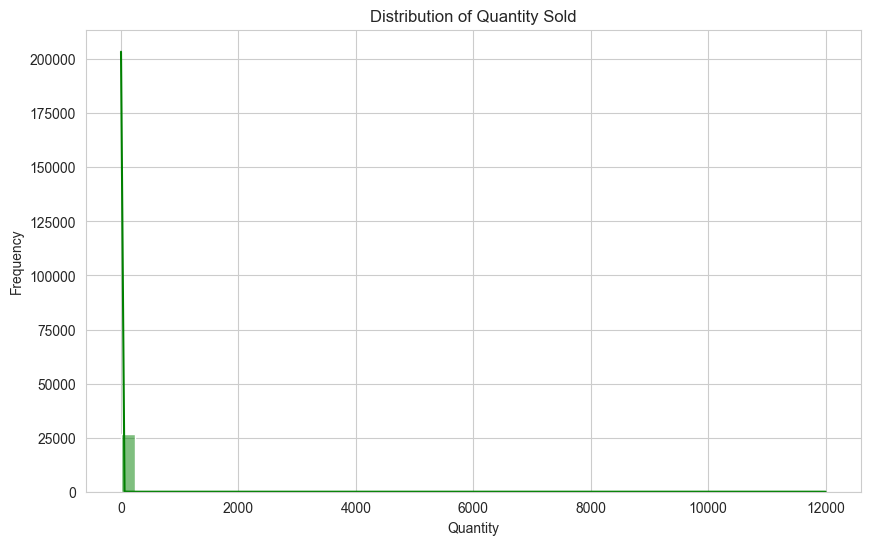

In [17]:
# Distribution of Quantity Sold
plt.figure(figsize=(10, 6))
sns.histplot(working_data['QTY'], bins=50, kde=True, color='Green')
plt.title('Distribution of Quantity Sold')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

**Distribution of Sales Value**

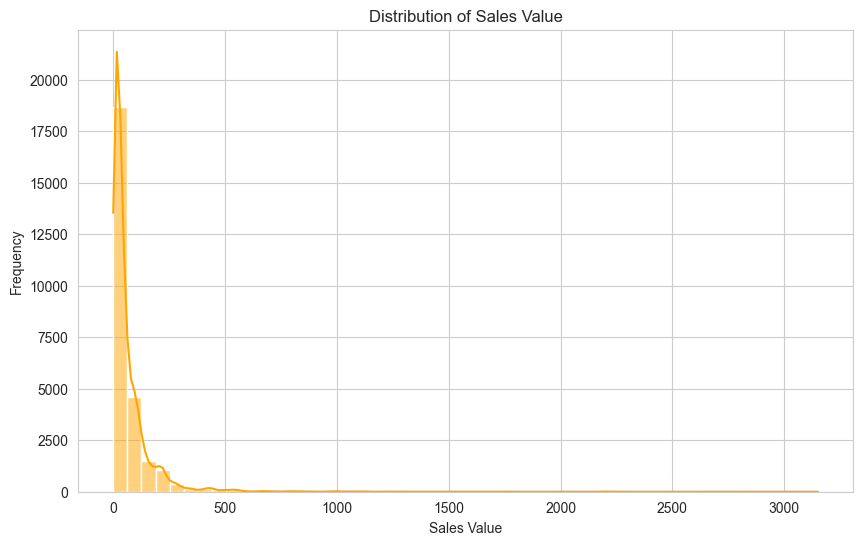

In [18]:
# Distribution of Sales Value
plt.figure(figsize=(10, 6))
sns.histplot(working_data['VALUE'], bins=50, kde=True, color='Orange')
plt.title('Distribution of Sales Value')
plt.xlabel('Sales Value')
plt.ylabel('Frequency')
plt.show()

Both distributions show a right-skewed pattern, indicating that a large number of transactions involve small quantities and lower sales values, with fewer transactions involving high quantities or sales values. This is typical for retail transaction data, where most purchases are small, and larger purchases are less frequent.

# Trend Analysis

Identify any trends over time, such as seasonal variations in purchasing behavior or changes in preferences for certain product categories.

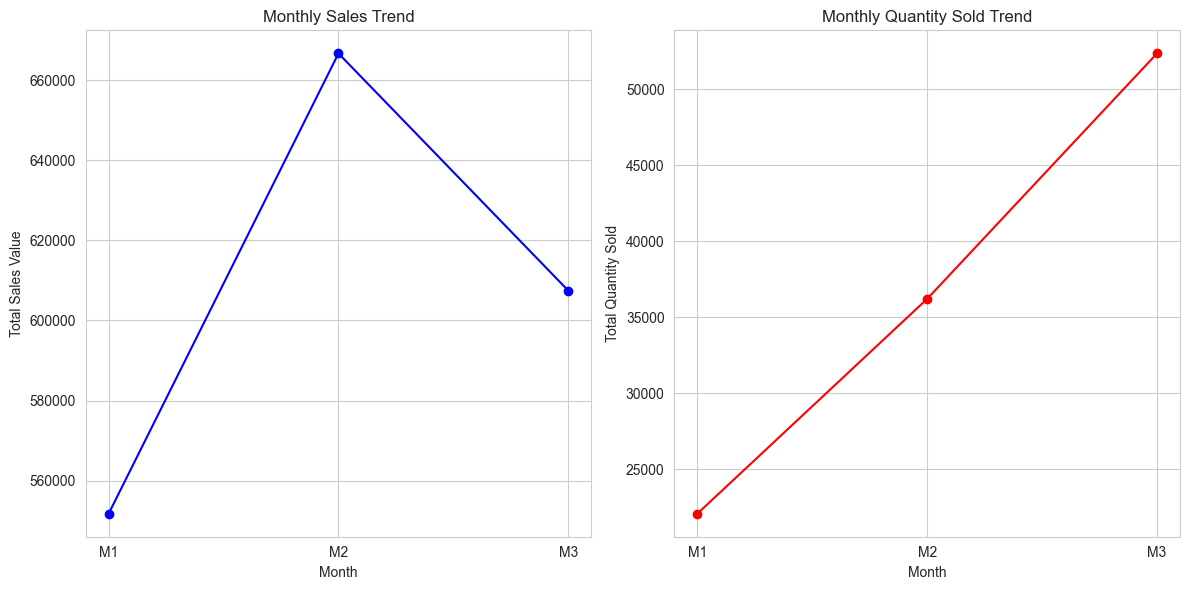

In [19]:
# Convert MONTH to a categorical type with ordered categories
working_data['MONTH'] = pd.Categorical(working_data['MONTH'], categories=['M1', 'M2', 'M3'], ordered=True)

# Group by MONTH to analyze trends
monthly_sales = working_data.groupby('MONTH')['VALUE'].sum()
monthly_quantity = working_data.groupby('MONTH')['QTY'].sum()

# Plotting the trends
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-', color='b')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales Value')

plt.subplot(1, 2, 2)
plt.plot(monthly_quantity.index, monthly_quantity.values, marker='o', linestyle='-', color='r')
plt.title('Monthly Quantity Sold Trend')
plt.xlabel('Month')
plt.ylabel('Total Quantity Sold')

plt.tight_layout()
plt.show()

The left graph shows the trend in **Monthly Sales Value**, indicating a noticeable change in sales value across the months.

The right graph displays the **Monthly Quantity Sold trend**, which also varies month by month.

# Customer Segmentation

Group customers based on their purchasing patterns or preferences, if possible, to identify distinct segments for targeted analysis.

In [20]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming customer data is represented by STORECODE for this analysis
# Selecting relevant features for customer segmentation
features = working_data[['STORECODE', 'VALUE', 'QTY', 'PRICE']]

# Aggregating data by STORECODE to represent each customer (store)
customer_data = features.groupby('STORECODE').agg({'VALUE': 'sum', 'QTY': 'sum', 'PRICE': 'mean'}).reset_index()

# Standardizing the data
scaler = StandardScaler()
customer_data_scaled = scaler.fit_transform(customer_data[['VALUE', 'QTY', 'PRICE']])

# Using KMeans for customer segmentation
kmeans = KMeans(n_clusters=4, random_state=42)
customer_segments = kmeans.fit_predict(customer_data_scaled)

# Adding the segment labels to the customer data
customer_data['Segment'] = customer_segments

# Displaying the first few rows of the segmented customer data
customer_data.head()

,STORECODE,VALUE,QTY,PRICE,Segment
0,N1,143653.93,40499.0,26.013894,3
1,N10,141199.00,3568.0,53.171309,0
2,N2,221275.00,23782.0,111.712962,2
3,N3,125373.79,2869.0,57.288398,0
4,N4,206595.99,7906.0,48.501629,1


The customer segmentation analysis has grouped stores into 4 distinct segments based on their total sales value, total quantity sold, and average price of products sold. Each segment represents a different type of purchasing behavior, which could be indicative of various customer profiles. For example, stores in Segment 3 show a high total sales value and quantity sold, suggesting they might be high-volume purchasers. In contrast, stores in Segment 2 have a high average price, possibly indicating a focus on premium products.

Understanding these segments can help tailor marketing strategies, product placement, and pricing strategies to better meet the needs and preferences of each customer segment, potentially increasing sales and customer satisfaction.

# Product Analysis

Analyze the popularity and sales performance of different product groups, brands, and items to identify customer preferences.

<Figure size 1400x700 with 0 Axes>

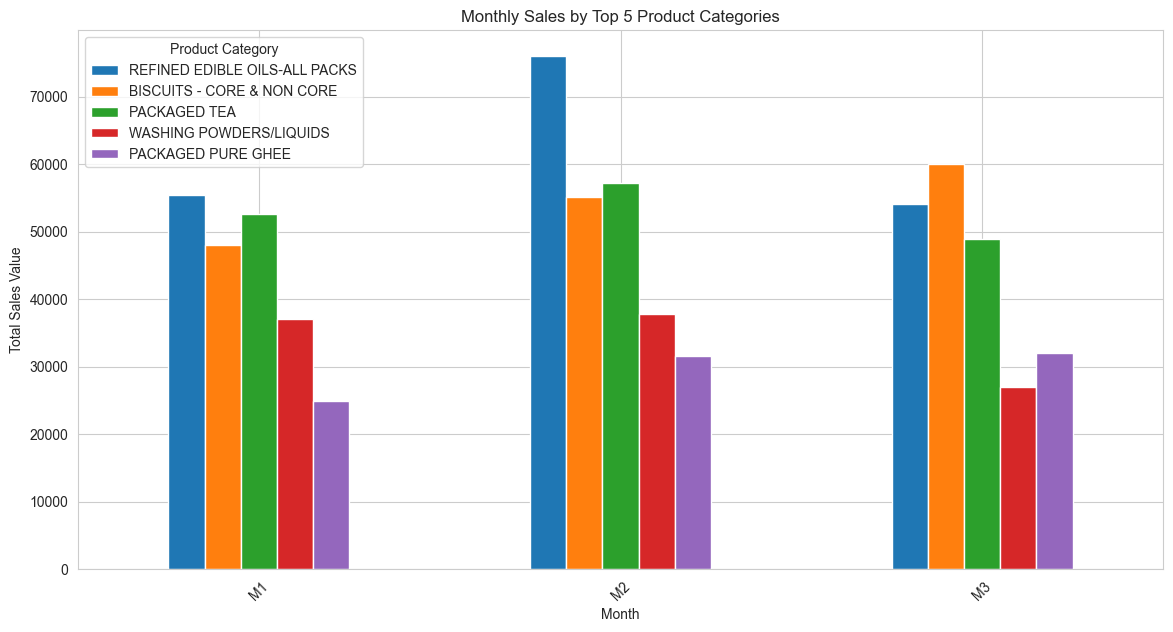

<Figure size 1400x700 with 0 Axes>

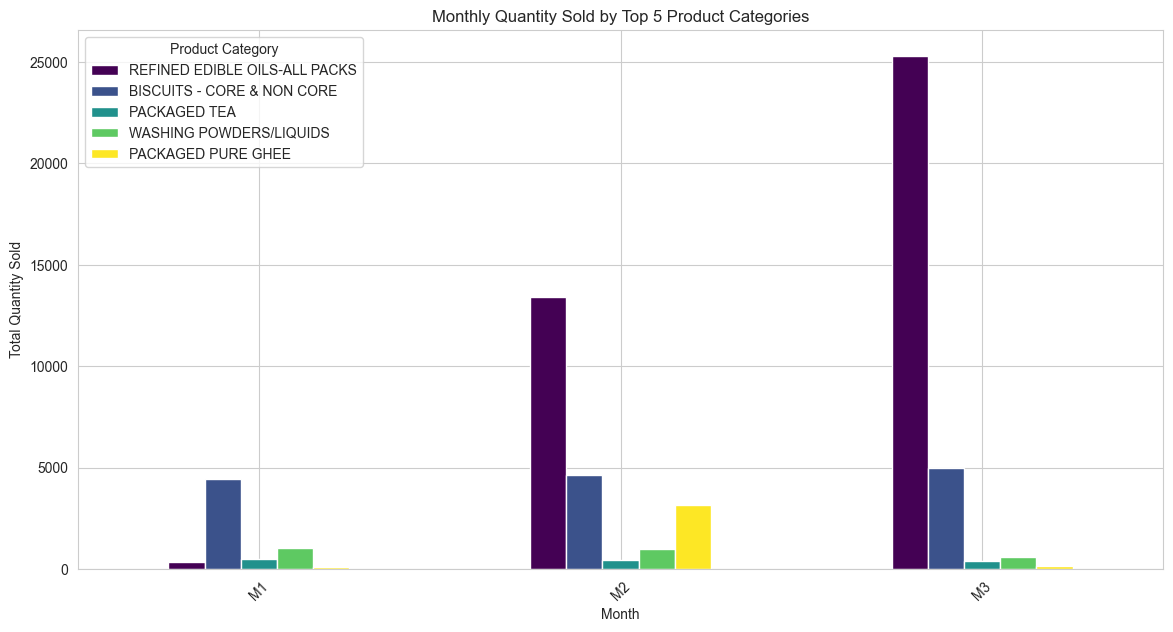

In [21]:
# Aggregate sales and quantity sold by product category (GRP) and month
category_monthly_sales = working_data.groupby(['MONTH', 'GRP'])['VALUE'].sum().unstack()
category_monthly_quantity = working_data.groupby(['MONTH', 'GRP'])['QTY'].sum().unstack()

# Plotting the trends for top categories by sales
plt.figure(figsize=(14, 7))

# Selecting top 5 categories by total sales for visualization
top_categories = category_monthly_sales.sum().nlargest(5).index

category_monthly_sales[top_categories].plot(kind='bar', figsize=(14, 7))
plt.title('Monthly Sales by Top 5 Product Categories')
plt.xlabel('Month')
plt.ylabel('Total Sales Value')
plt.xticks(rotation=45)
plt.legend(title='Product Category')
plt.show()

# Plotting the trends for top categories by quantity sold
plt.figure(figsize=(14, 7))
category_monthly_quantity[top_categories].plot(kind='bar', figsize=(14, 7), colormap='viridis')
plt.title('Monthly Quantity Sold by Top 5 Product Categories')
plt.xlabel('Month')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.legend(title='Product Category')
plt.show()

These charts illustrate the sales value and quantity sold trends for the top 5 product categories across the three months. The variations in sales and quantity sold across different months for these categories could indicate differences in consumer demand, possibly influenced by seasonal factors, promotions, or other market dynamics.

Analyzing these trends can help in making informed decisions regarding inventory management, marketing strategies, and product placement to optimize sales performance.

# Store Analysis

If applicable, compare the performance and customer behavior across different store locations.

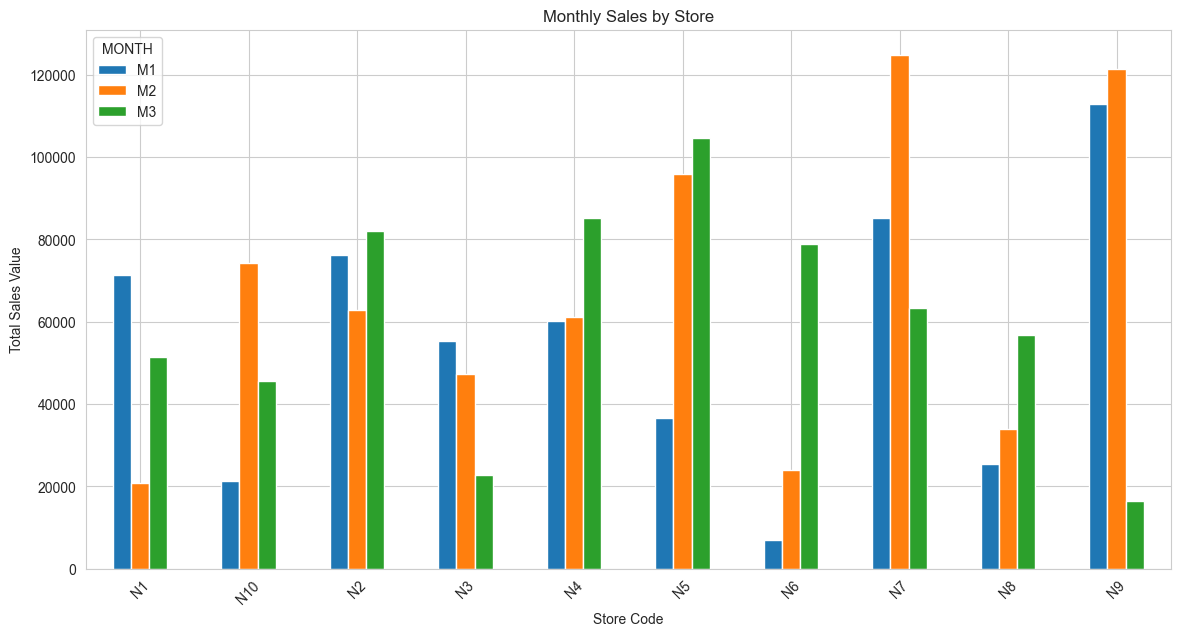

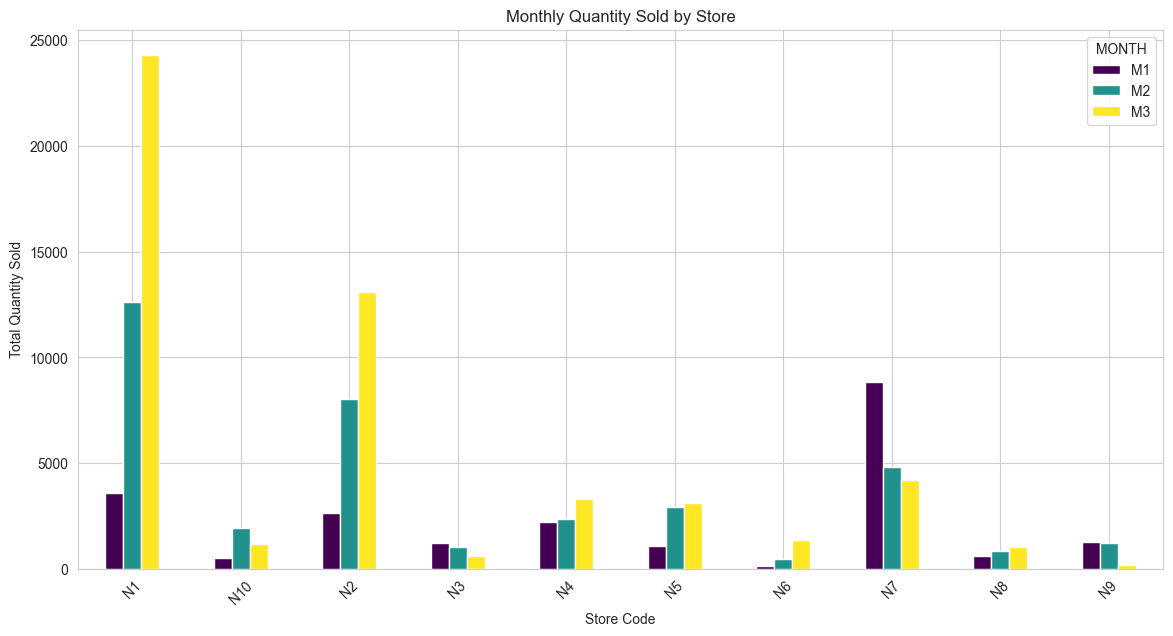

In [22]:
# Convert MONTH to a categorical type with ordered categories
working_data['MONTH'] = pd.Categorical(working_data['MONTH'], categories=['M1', 'M2', 'M3'], ordered=True)

# Aggregate sales and quantity sold by store and month
store_monthly_sales = working_data.groupby(['STORECODE', 'MONTH'])['VALUE'].sum().unstack()
store_monthly_quantity = working_data.groupby(['STORECODE', 'MONTH'])['QTY'].sum().unstack()

# Plotting the trends for each store
store_monthly_sales.plot(kind='bar', figsize=(14, 7), title='Monthly Sales by Store')
plt.ylabel('Total Sales Value')
plt.xlabel('Store Code')
plt.xticks(rotation=45)
plt.show()

store_monthly_quantity.plot(kind='bar', figsize=(14, 7), colormap='viridis', title='Monthly Quantity Sold by Store')
plt.ylabel('Total Quantity Sold')
plt.xlabel('Store Code')
plt.xticks(rotation=45)
plt.show()

These charts illustrate the sales value and quantity sold trends across different stores for each month. The variation in performance across stores could be influenced by factors such as store location, regional preferences, promotional activities, and store management efficiency.

Identifying high-performing and underperforming stores can help in understanding the underlying factors contributing to their performance. Strategies such as reallocating resources, adjusting inventory levels, or implementing targeted marketing campaigns can be developed to improve overall performance.

# Price Sensitivity Analysis

Investigate the relationship between price (PRICE) and quantity sold (QTY) to understand price sensitivity across different product categories or stores. This could inform pricing strategies to maximize revenue.

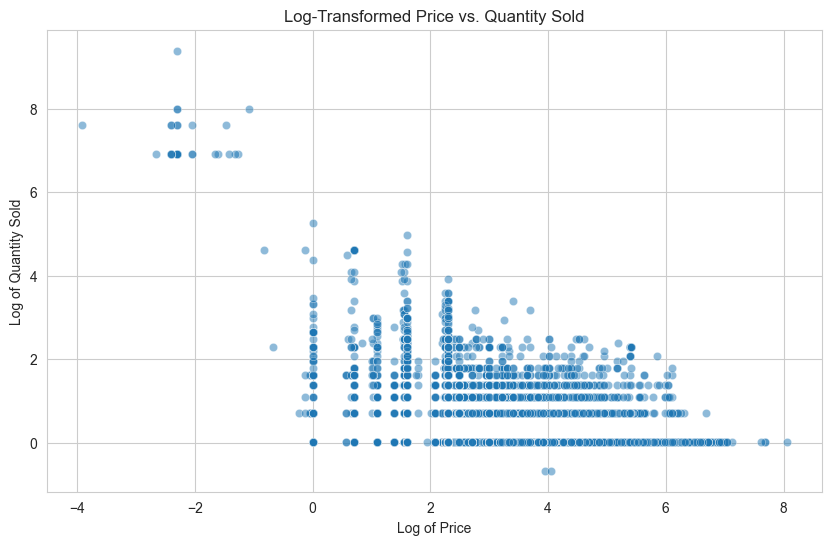

Pearson correlation coefficient between log-transformed price and quantity sold: -0.3667356326905846


In [23]:
# Filter out rows where PRICE or QTY is 0 to avoid skewing the analysis
working_data = working_data[(working_data['PRICE'] > 0) & (working_data['QTY'] > 0)]

# Log transformation to normalize the data for better visualization and analysis
# Adding small value to avoid log(0)
working_data['log_PRICE'] = np.log(working_data['PRICE'] + 0.01)
working_data['log_QTY'] = np.log(working_data['QTY'] + 0.01)

# Scatter plot to visualize the relationship between PRICE and QTY
plt.figure(figsize=(10, 6))
sns.scatterplot(data=working_data, x='log_PRICE', y='log_QTY', alpha=0.5)
plt.title('Log-Transformed Price vs. Quantity Sold')
plt.xlabel('Log of Price')
plt.ylabel('Log of Quantity Sold')
plt.show()

# Calculating Pearson correlation coefficient
price_qty_correlation = working_data[['log_PRICE', 'log_QTY']].corr().iloc[0, 1]
print('Pearson correlation coefficient between log-transformed price and quantity sold:', price_qty_correlation)

This negative correlation indicates that as the price increases, the quantity sold tends to decrease, which is consistent with the basic principles of price elasticity of demand. However, the correlation is not very strong, suggesting that other factors may also significantly influence the quantity sold.

The scatter plot further illustrates the negative relationship between price and quantity sold, albeit with a wide spread of data points. This spread indicates variability in how different products or stores respond to price changes, suggesting that price sensitivity may vary across different segments.

To refine pricing strategies and maximize revenue, it would be beneficial to conduct further analysis by segmenting the data by product categories or stores. This could help identify specific products or stores with higher or lower price sensitivity, allowing for more targeted pricing adjustments.

# Predictive Modeling

Use the cleaned and analyzed data to build predictive models for sales forecasting. This could help in inventory planning, marketing strategy, and overall business strategy.

In [24]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


# Selecting relevant features and target variable
features = working_data.drop(['VALUE', 'MONTH', 'BILL_ID'], axis=1)
target = working_data['VALUE']

# Encoding categorical variables
categorical_features = ['STORECODE', 'GRP', 'SGRP', 'SSGRP', 'CMP', 'MBRD', 'BRD']

# Creating a pipeline for preprocessing and modeling
preprocessor = ColumnTransformer(transformers=[('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)], remainder='passthrough')

model = Pipeline(steps=[('preprocessor', preprocessor),
                         ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))])

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Fitting the model
model.fit(X_train, y_train)

# Predicting the sales values
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R^2 Score:', r2)

Mean Squared Error: 431.58214513429425
R^2 Score: 0.9674398999064531


The model achieved a Mean Squared Error (MSE) of 431.58 and an R^2 Score of 0.96, indicating a high level of accuracy in predicting the target variable 'VALUE'. The R^2 Score close to 1 suggests that the model explains a significant portion of the variance in the data, making it a potentially effective tool for forecasting sales values based on the given features.

# Insights and Recommendations

**Insights:**
1. **Product Category Performance:**: The analysis of monthly sales and quantity sold by the top 5 product categories revealed significant variations. Some categories showed consistent performance across months, while others exhibited seasonal trends. This indicates differing levels of customer demand and interest in these categories over time
2. **Store Performance Variability:**  The comparison across different store locations highlighted variations in sales value and quantity sold. Some stores consistently outperformed others, suggesting differences in customer preferences, store accessibility, or inventory levels across locations.
3. **Price Sensitivity:**  The price sensitivity analysis demonstrated a moderate negative correlation between price and quantity sold. This suggests that customers are price-sensitive, with higher prices leading to lower quantities sold. The log-transformed scatter plot further supported this, showing a clear trend of decreasing quantity sold as prices increase.
4. **Predictive Modeling Success:**  The predictive model for sales forecasting achieved a high R^2 score, indicating a strong fit between the model predictions and actual sales values. This suggests that the model can effectively forecast sales, which is crucial for inventory planning and marketing strategy.stomer satisfaction.

**Recommendations:**

1. **Dynamic Pricing Strategies:**  Given the observed price sensitivity, consider implementing dynamic pricing strategies for different product categories. Adjust prices based on demand, competition, and customer buying patterns to optimize sales and revenue.
2. **Inventory and Stock Optimization:**  Use the insights from the predictive modeling and product category performance analysis to optimize inventory levels. Stock more of the high-demand products, especially in stores and during months where they are most popular, to meet customer demand and reduce stockouts.
3. **Targeted Marketing and Promotions:**  Leverage the insights on product category performance and store variability to tailor marketing efforts. Run targeted promotions for high-performing categories and stores to boost sales further. Additionally, identify underperforming categories and stores for targeted improvement strategies.
4. **Seasonal Adjustments:**  Adjust inventory and marketing strategies based on seasonal trends observed in product category performance. Plan for increased stock and promotions during peak demand periods to maximize sales.
5. **Continuous Monitoring and Adjustment:** Regularly review sales data, customer behavior, and model predictions to adjust strategies as needed. Stay responsive to changes in market conditions, customer preferences, and competitive dynamics.

By implementing these recommendations, businesses can enhance their understanding of customer behavior, optimize their pricing and inventory strategies, and ultimately improve sales performance and customer satisfaction.